In [2]:
import pywt # pip install pywavelets
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

La compresión de imágenes por wavelets es un proceso que utiliza la transformada wavelet discreta 2D para descomponer una imagen en diferentes frecuencias y direcciones. La transformada wavelet discreta 2D se realiza utilizando una familia de wavelets, como `haar`, `db1`, `sym2` o `coif5`. Los coeficientes resultantes se comprimen mediante un umbral suave y se utilizan para reconstruir la imagen comprimida.

El parámetro `wavelet_family` se utiliza para especificar la familia de wavelets a utilizar. Algunas familias populares incluyen `haar`, `db1`, `sym2` y `coif5`. El parámetro `threshold` se utiliza para establecer el valor del umbral suave utilizado para comprimir los coeficientes wavelet. Los coeficientes cuyo valor absoluto es menor que el umbral se establecen en cero, mientras que los coeficientes cuyo valor absoluto es mayor que el umbral se mantienen sin cambios. El parámetro `filter` se utiliza para especificar el tipo de filtro utilizado para la descomposición wavelet.

El proceso de compresión de imágenes por wavelets implica los siguientes pasos:

1. Cargar la imagen original.
2. Realizar una transformada wavelet discreta 2D en la imagen utilizando una familia de wavelets especificada.
3. Comprimir los coeficientes resultantes mediante un umbral suave.
4. Reconstruir la imagen comprimida utilizando los coeficientes comprimidos.
5. Visualizar la imagen original y la imagen comprimida.

La compresión de imágenes por wavelets puede ser utilizada para reducir el tamaño de las imágenes digitales sin perder demasiada información visual. Sin embargo, es importante tener en cuenta que la calidad de la imagen comprimida depende del valor del umbral suave utilizado y de la familia de wavelets seleccionada.

(1) Uso de la Transformada de Wavelet para la compresión de imágenes .... http://lcr.uns.edu.ar/fvc/NotasDeAplicacion/FVC-Gonzalo%20D%20Acosta.pdf.
(2) Compresión de imágenes con Wavelets y Multiwavelets - Redalyc. https://www.redalyc.org/articulo.oa?id=498850160008.
(3) Tratamiento de imágenes digitales mediante wavelets. http://personales.upv.es/aperis/wavelets/imagenes/indice.htm.
(4) Compresión de imágenes Haar Wavelet - Studocu. https://www.studocu.com/es-mx/document/universidad-autonoma-de-coahuila/algebra-lineal/compresion-de-imagenes-haar-wavelet/3068260.
(5) Compresión de Imágenes Fijas utilizando la Trasformada Wavelet - CORE. https://core.ac.uk/download/pdf/15780665.pdf.
(6) Single-level 2-D discrete wavelet transform - MATLAB dwt2 - MathWorks. https://www.mathworks.com/help/wavelet/ref/dwt2.html.
(7) Filters (Wavelet): Thresholding - MIPAV - National Institutes of Health. https://mipav.cit.nih.gov/pubwiki/index.php/Filters_%28Wavelet%29:_Thresholding.
(8) python - How to find threshold value and which wavelet family to use .... https://stackoverflow.com/questions/59886413/how-to-find-threshold-value-and-which-wavelet-family-to-use-for-low-pass-filter.

In [4]:
def compress_image(image_path, wavelet_family):
    # Load the image
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Decompose the image using the specified wavelet family
    coeffs = pywt.dwt2(image_array, wavelet_family)
    # Discard some of the coefficients to compress the image
    compressed_coeffs = [pywt.threshold(i, value = 5, mode='garrote') for i in coeffs] #th dfault value = 0.1, mode dfault value = soft
    # Reconstruct the compressed image
    compressed_image = pywt.idwt2(compressed_coeffs, wavelet_family)
    # Convert the numpy array back to an image
    compressed_image = Image.fromarray(np.uint8(compressed_image))
    return compressed_image

# Example usage:
image_path = 'data/Lena.png'
wavelet_family = 'haar'
compressed_image = compress_image(image_path, wavelet_family)
compressed_image.show()
compressed_image.save("./data/Lena_comp_haar_th_5_mode_garrote_filter_LoD.png","PNG")

Filtros unidimensionales con wavelets discretas

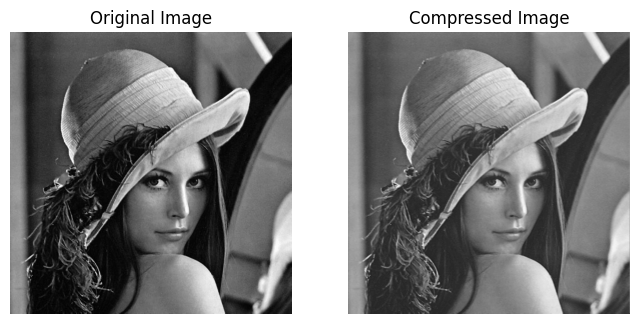

In [2]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

def daubechies_wavelet(data):

    # Coeficientes de Daubechies
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')

    return cA, cD

def inverse_daubechies_wavelet(cA, cD):

    # Coeficientes inversos
    g0 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    g1 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes inversos
    data_approx = np.convolve(cA, g0, mode='same')
    data_detail = np.convolve(cD, g1, mode='same')

    return data_approx + data_detail

def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    cA = np.convolve(data, h0, mode='same')
    cD = np.convolve(data, h1, mode='same')

    if False: # filtro continuo, no va
        h0 = lambda x: 0.5 if 0 <= x < 1 else 0.0
        h1 = lambda x: -0.5 if 0 <= x < 1 else 0.0

        cA = np.convolve(data, [h0(x) for x in np.arange(len(data))], mode='same')
        cD = np.convolve(data, [h1(x) for x in np.arange(len(data))], mode='same')
        

    return cA, cD

def inverse_haar_wavelet(cA, cD):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    data_approx = np.convolve(cA, h0, mode='same')
    data_detail = np.convolve(cD, h1, mode='same')

    if False: # filtro continuo, no va
        h0 = lambda x: 0.5 if 0 <= x < 1 else 0.0
        h1 = lambda x: -0.5 if 0 <= x < 1 else 0.0

        data_approx = np.convolve(cA, [h0(x) for x in np.arange(len(cA))], mode='same')
        data_detail = np.convolve(cD, [h1(x) for x in np.arange(len(cD))], mode='same')

    return data_approx + data_detail

def coiflet_wavelet(data):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with wavelet coefficients
    cA = np.convolve(data, [h0, h1, h2, h3], mode='same')
    cD = np.convolve(data, [-h3, h2, -h1, h0], mode='same')

    return cA, cD

def inverse_coiflet_wavelet(cA, cD):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with inverse wavelet coefficients
    data_approx = np.convolve(cA, [h0, h1, h2, h3], mode='same')
    data_detail = np.convolve(cD, [-h3, h2, -h1, h0], mode='same')

    return data_approx + data_detail

def wavelet_compress(image_path, compression_ratio = 0.1, wavelet_family = 'daubechies_1'):

    # Carga de la imagen en escala de grises
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convolución con la wavelet
    if wavelet_family == 'daubechies_1':
        flattened_image = original_image.flatten()
        cA, cD = daubechies_wavelet(flattened_image)

    elif wavelet_family == 'haar':
        flattened_image = original_image.flatten()
        cA, cD = haar_wavelet(flattened_image)

    elif wavelet_family == 'coiflet_1':
        flattened_image = original_image.flatten()
        cA, cD = coiflet_wavelet(flattened_image)

    else:
        raise Exception(f'La familia de wavelets {wavelet_family} no está implementada.')
    
    # Compresión: eliminamos coeficientes por debajo del umbral
    threshold = compression_ratio * np.max(np.abs(cD))
    cD_thresholded = np.where(np.abs(cD) < threshold, 0, cD)

    # Transformada inversa
    if wavelet_family == 'daubechies_1':
        compressed_image_flat = inverse_daubechies_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'haar':
        compressed_image_flat = inverse_haar_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'coiflet_1':
        compressed_image_flat = inverse_coiflet_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)
    
    # Guaradado de la imagen comprimida
    output_image_path = f'./data/Lena_{wavelet_family}.png'
    cv2.imwrite(output_image_path, compressed_image.astype(np.uint8))

    # Representación
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()

    return compressed_image

# Example usage
input_image_path = './data/Lena.png'
wavelet_family = 'coiflet_1'
compression_ratio = 1  # You can adjust this value based on your desired compression ratio

compressed_image = wavelet_compress(input_image_path, compression_ratio, wavelet_family)


In [14]:
def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')
    return cA, cD

def inverse_haar_wavelet(cA = [], cD = []):

    if not(len(cA) > 0 or len(cD) > 0):
        raise Exception("Eres inútil.")
    
    if len(cA) > 0:
        h0 = np.array([0.5, 0.5])
        data_approx = np.convolve(cA, h0, mode = 'same')
    else:
        data_approx = 0
        
    if len(cD) > 0:
        h1 = np.array([-0.5, 0.5])
        data_detail = np.convolve(cD, h1, mode = 'same')
    else:
        data_detail = 0
    
    return data_approx + data_detail

image_path = './data/Lena.png'
n_niveles = 100
cA = []
cD = []
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
flattened_image = original_image.flatten()
cA_0, cD_0 = haar_wavelet(flattened_image)
cA.append(cA_0)
cD.append(cD_0)
for i in range(1, n_niveles):
    # image_cAi = inverse_haar_wavelet(cA[i - 1])
    # cAi, cDi = haar_wavelet(image_cAi)
    cAi, cDi = haar_wavelet(cA[i - 1])
    cA.append(cAi)
    cD.append(cDi)


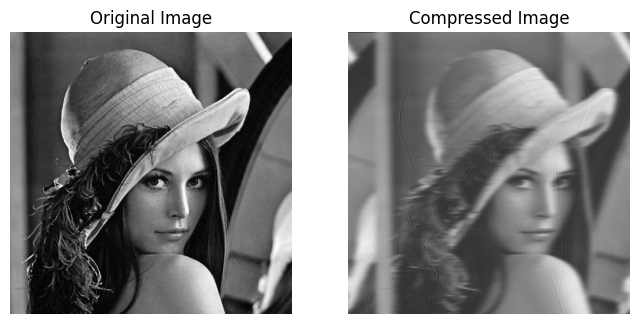

In [15]:

compressed_image_flat = inverse_haar_wavelet(cA = cA[-1], cD = cD[0])
compressed_image = compressed_image_flat.reshape(original_image.shape)

plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap = 'gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()
# Buscar algoritmo de mallat

Proceso de compresion de video

Para comprimir videos mediante `Wavelets`, hemos realizado el proceso en tres fases, primero dividir el video en frames, segundo aplicarle la transformada wavelet de elección y la inversa, tercero volver a unir los frames en video.

In [3]:
import cv2 # pip install opencv-python
import os

# Ruta del video
video_path = './data/baile.mp4'

# Crear una carpeta para almacenar los frames si no existe
output_folder = './data/frames_video_original'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Abre el video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error al abrir el video")
    exit()

# Lee y guarda cada frame como una imagen
frame_count = 0
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Guarda el frame en la carpeta de salida como una imagen (puedes cambiar el formato de la imagen si lo deseas)
    output_path = os.path.join(output_folder, f'frame_{frame_count}.jpg')
    cv2.imwrite(output_path, frame)

    frame_count += 1

# Libera el objeto de captura y cierra las ventanas
cap.release()
cv2.destroyAllWindows()


Filtro a 3 niveles threshold por percentiles

In [4]:
import cv2
import os
import re
import pywt
import numpy as np

# Directorio donde se encuentran los frames de video
frames_dir = './data/frames_video_original'
output_dir = './data/frames_modificados'

# Crear el directorio de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Obtener la lista de nombres de archivos en el directorio de frames
frame_files = [f for f in os.listdir(frames_dir) if f.endswith('.jpg')]

# Ordenar los nombres de archivos de manera alfanumérica
frame_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

# Iterar sobre cada frame y aplicar la transformada wavelet de Mallat
for filename in frame_files:
    frame_path = os.path.join(frames_dir, filename)
    frame = cv2.imread(frame_path)   
    
    
    # Aplicar la transformada wavelet ((wavedec2) para varios niveles (por ejemplo, 3 niveles)
    coeffs = pywt.wavedec2(frame, 'db4', level= 3)
    
    # Coeficientes de aproximación y detalle
    cA, cD = coeffs[0], coeffs[1:]
    
    # Función para aplicar threshold basado en un percentil
    def threshold_percentile(coef, percentile):
        threshold = np.percentile(np.abs(coef), percentile)
        thresholded_coef = np.where(np.abs(coef) > threshold, coef, 0)
        return thresholded_coef
    
    thresholded_cD = []
    for i, detail_level in enumerate(cD):
        if i == 0:  # Último nivel de detalle
            thresholded_level = []
            for coef in detail_level:
                percentile = 90  # Cambia este valor según el porcentaje deseado
                thresholded_coef = threshold_percentile(coef, percentile)
                thresholded_level.append(thresholded_coef)
            thresholded_cD.append(tuple(thresholded_level))
        else:
            thresholded_cD.append(tuple(detail_level)) # Mantener los niveles anteriores sin cambios

    # Reconstruir los coeficientes combinando la aproximación y los nuevos coeficientes de detalle
    thresholded_coeffs = (cA, *thresholded_cD)
    
    # Reconstruir la imagen usando los coeficientes transformados
    reconstructed_frame = pywt.waverec2(thresholded_coeffs, 'db4')
    
    # Escalar los valores para evitar valores fuera de rango
    reconstructed_frame = np.clip(reconstructed_frame, 0, 255)
    reconstructed_frame = reconstructed_frame.astype(np.uint8)
    
    # Guardar la imagen reconstruida en el directorio de salida
    output_path = os.path.join(output_dir, 'reconstructed_' + filename)
    cv2.imwrite(output_path, reconstructed_frame)

c:\Users\Admin\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [5]:
import cv2
import os

# Directorio donde se encuentran los frames de video
frames_dir = './data/frames_modificados'
output_video = './data/video_salida.mp4'

# Obtener la lista de nombres de archivos en el directorio de frames
frame_files = [f for f in os.listdir(frames_dir) if f.startswith('reconstructed_frame_') and f.endswith('.jpg')]

# Ordenar los nombres de archivos en orden numérico
frame_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))  # Orden numérico

# Obtener el tamaño del primer frame para configurar el video de salida
first_frame = cv2.imread(os.path.join(frames_dir, frame_files[0]))
height, width, _ = first_frame.shape

# Crear un objeto VideoWriter para guardar el video resultante
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec de video
out = cv2.VideoWriter(output_video, fourcc, 30.0, (width, height))  # 30 fps

# Recorrer cada frame y escribirlo en el video de salida
for filename in frame_files:
    frame = cv2.imread(os.path.join(frames_dir, filename))
    out.write(frame)

# Liberar recursos y cerrar el objeto VideoWriter
out.release()
cv2.destroyAllWindows()

print(f"¡El video '{output_video}' se ha creado exitosamente!")


¡El video './data/video_salida.mp4' se ha creado exitosamente!


In [6]:
from moviepy.editor import * # pip install moviepy

# Ruta del archivo de entrada y salida
input_file = './data/video_salida.mp4'
output_file = "./data/video_convertido.mp4"

# Cargar el video con VideoFileClip
video = VideoFileClip(input_file)

# Escribir el video en el nuevo formato sin audio
video.write_videofile(output_file, codec='libx264')


Moviepy - Building video ./data/video_convertido.mp4.
Moviepy - Writing video ./data/video_convertido.mp4



Moviepy - Done !
Moviepy - video ready ./data/video_convertido.mp4
